<a href="https://colab.research.google.com/github/Tithimohanta/KNN/blob/main/210149_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [38]:
url="https://raw.githubusercontent.com/Tithimohanta/KNN/refs/heads/main/survey%20lung%20cancer.csv"
df=pd.read_csv(url)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Step 2: Initial Data Understanding

In [39]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [40]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


# Step 3: Duplicate rows remove

In [41]:
#Find Duplicate rows
df.duplicated().sum()

np.int64(33)

In [42]:
#Rows Duplicate rows
df.drop_duplicates(inplace=True)
df_count=df.duplicated().sum()
df_count

np.int64(0)

# Step 4: Pair Plot

<Figure size 1600x1000 with 0 Axes>

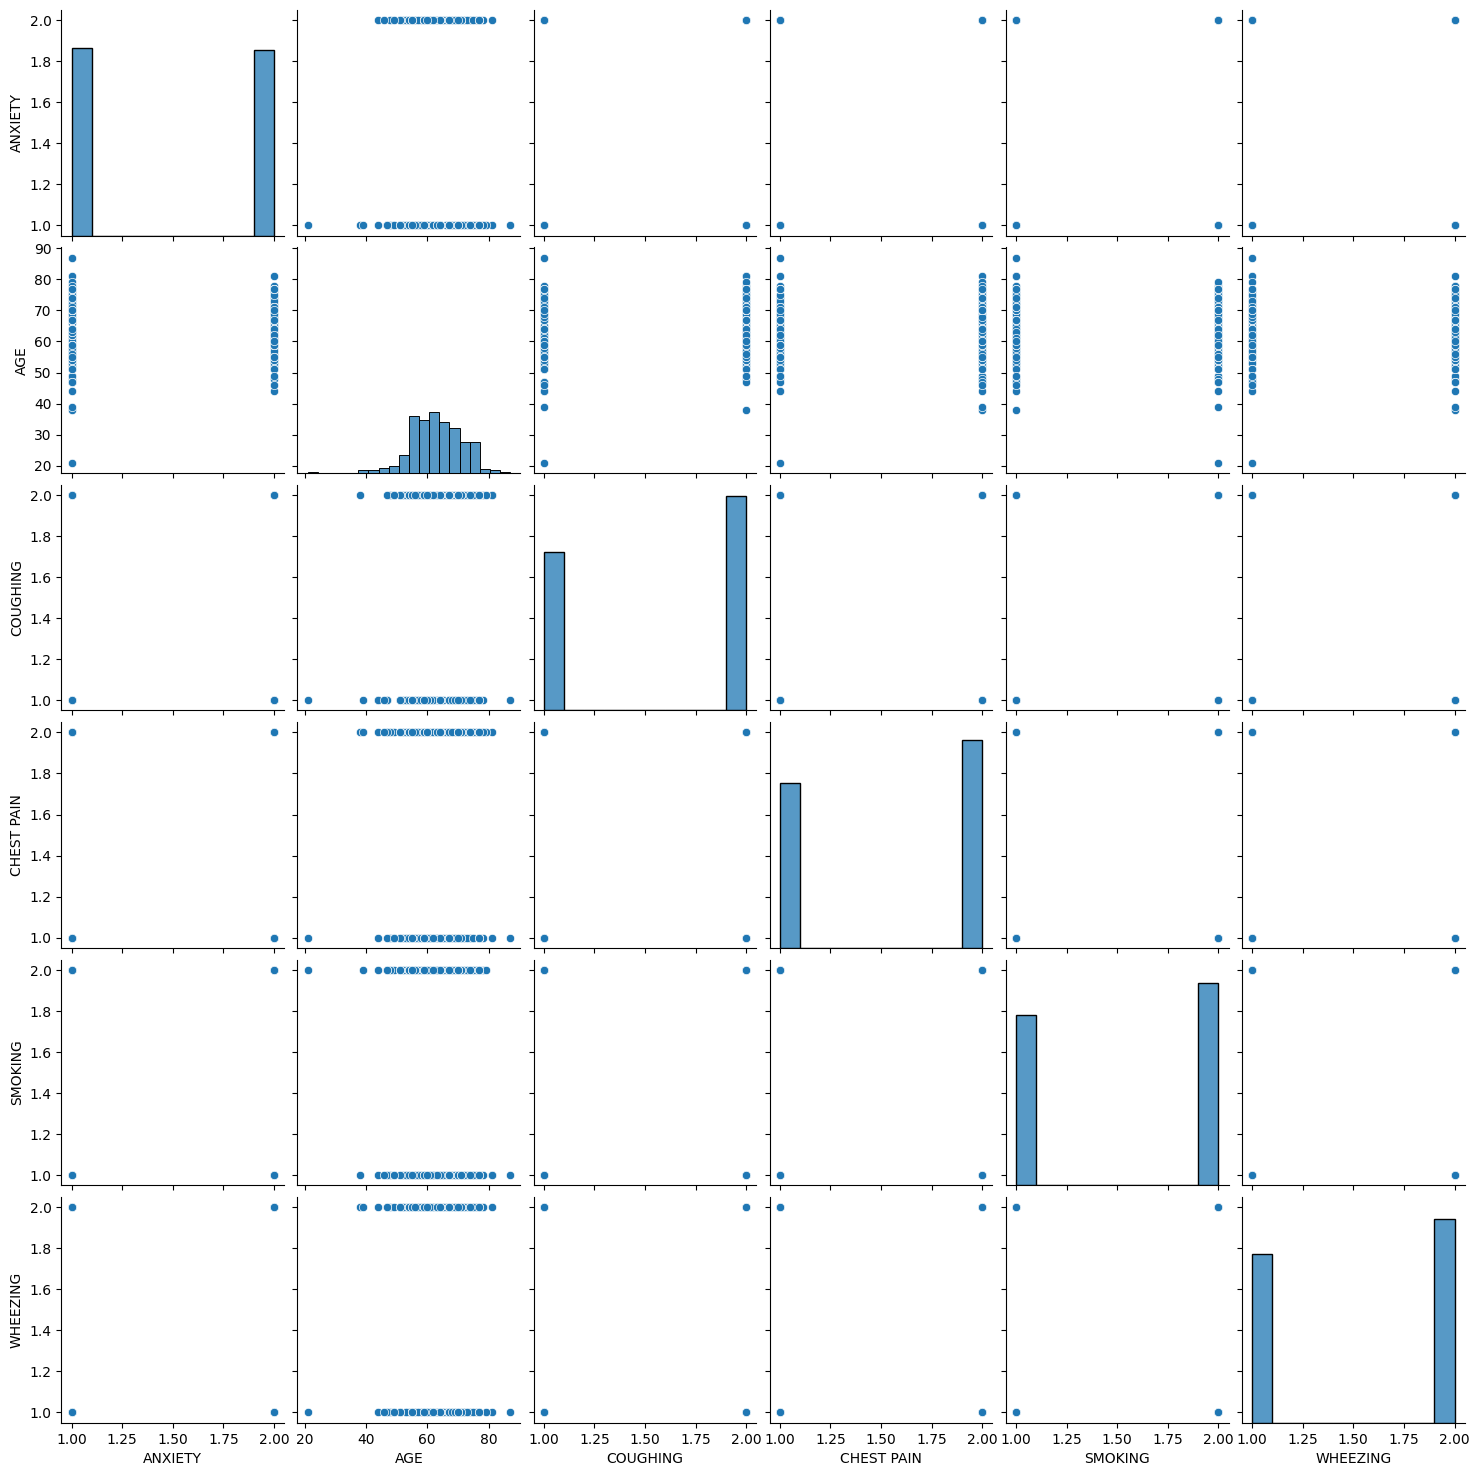

In [43]:
numeric_col=df[["ANXIETY","AGE","COUGHING","CHEST PAIN","SMOKING","WHEEZING"]]
plt.figure(figsize=(16,10))
sns.pairplot(numeric_col)
plt.show()

# Step 5: Encoding Categorical Columns

In [44]:
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [45]:
#Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


# Step 6: Heatmap (Correlation Matrix)

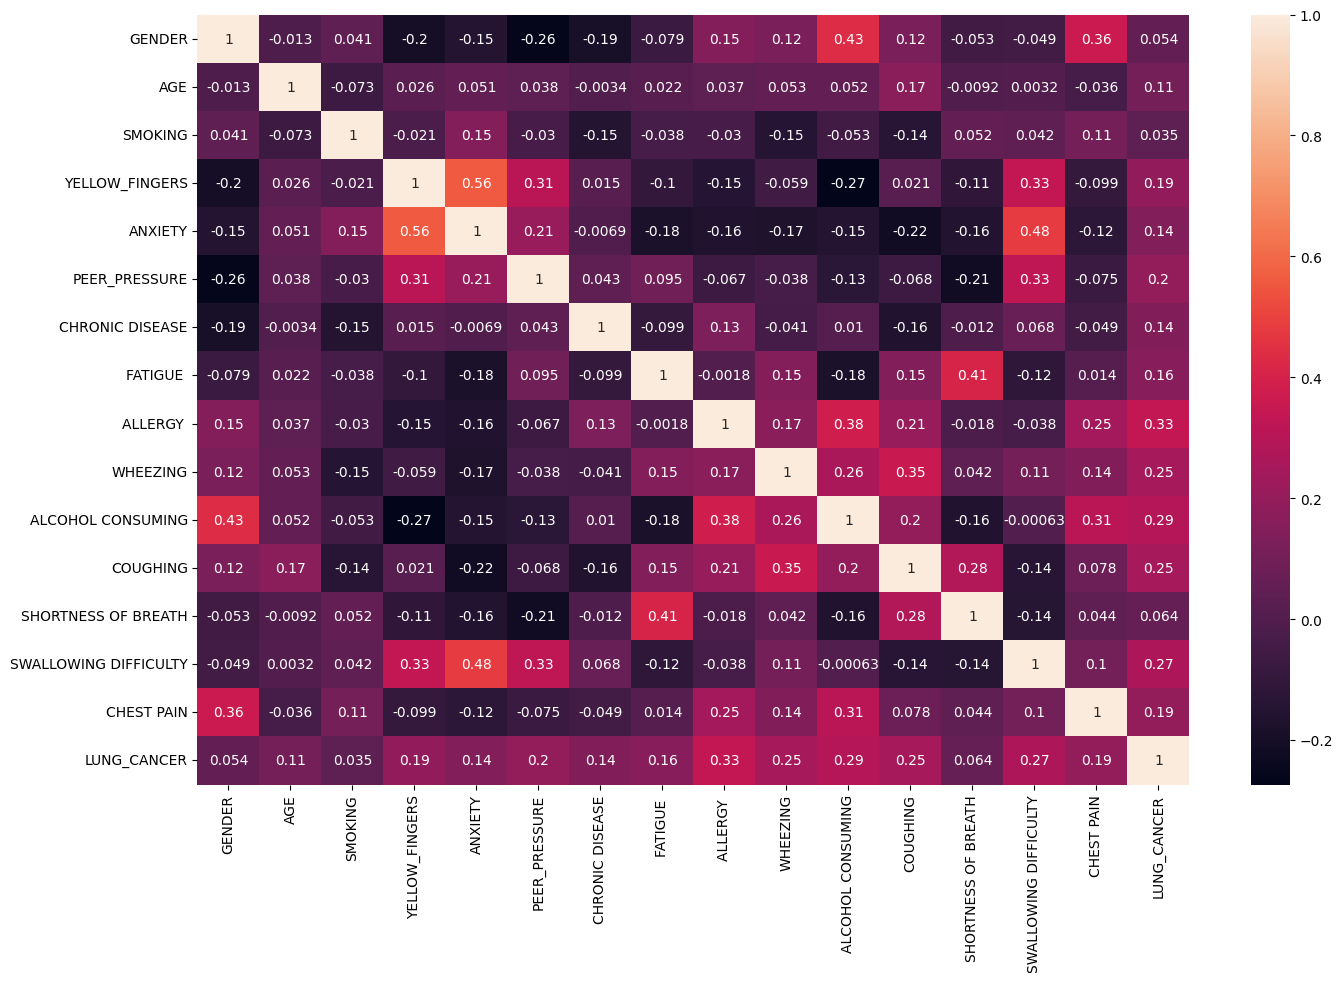

In [46]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#Step 7:Missing Value Handling

In [47]:
Imputer=SimpleImputer(strategy='mean')
df=pd.DataFrame(Imputer.fit_transform(df),columns=df.columns).astype(int)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


#Step 8: K-Nearest Neighbors Model training


In [48]:
X=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)
#Best method for leakage proof
pipeline=Pipeline([
    ('scalar',StandardScaler()),
    ("knn",KNeighborsClassifier())
])
pipeline.fit(X_train,y_train)

# Baseline KNN with default K=5 (already inside pipeline)
baseline_val_acc = pipeline.score(X_val, y_val)
baseline_test_acc = pipeline.score(X_test, y_test)

print("Baseline Validation Accuracy:", baseline_val_acc)
print("Baseline Test Accuracy:", baseline_test_acc)

Baseline Validation Accuracy: 0.8780487804878049
Baseline Test Accuracy: 0.9285714285714286


# STEP 9: Elbow Method (K vs Validation Error)

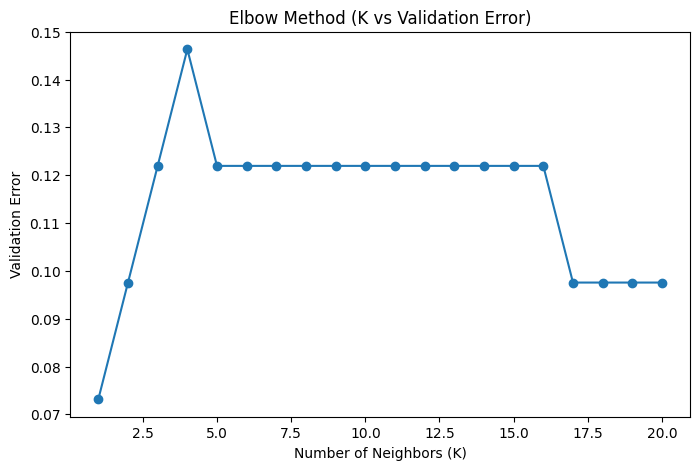

In [49]:
import matplotlib.pyplot as plt
import numpy as np

k_range = range(1, 21)
val_errors = []

for k in k_range:
    knn_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    knn_pipe.fit(X_train, y_train)
    val_error = 1 - knn_pipe.score(X_val, y_val)
    val_errors.append(val_error)

plt.figure(figsize=(8,5))
plt.plot(k_range, val_errors, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Validation Error")
plt.title("Elbow Method (K vs Validation Error)")
plt.show()


# STEP 10: Hyperparameter Tuning (GridSearchCV)

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "knn__n_neighbors": range(1, 21),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)


Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 13, 'knn__weights': 'uniform'}


# STEP 11: Final Model Evaluation (Test Set Only)

In [51]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score
)

y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9285714285714286
ROC AUC: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.92      1.00      0.96        36

    accuracy                           0.93        42
   macro avg       0.96      0.75      0.81        42
weighted avg       0.93      0.93      0.92        42



#STEP 12: Confusion Matrix Heatmap

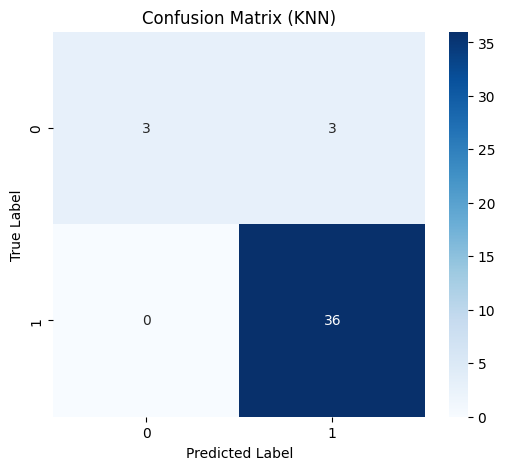

In [52]:
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (KNN)")
plt.show()


# STEP 13: ROC Curve

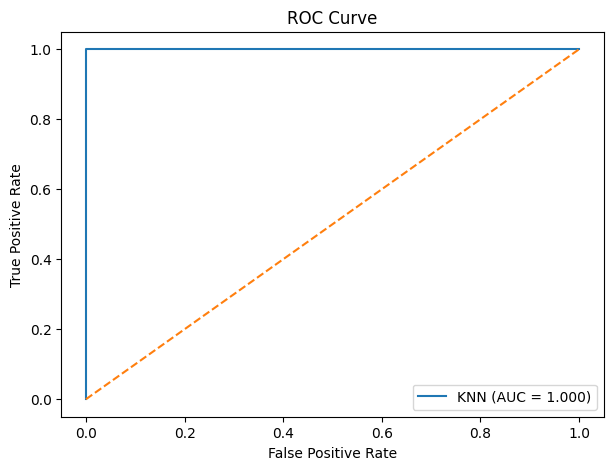

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc_score(y_test, y_test_prob):.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# STEP 14: 2D Decision Boundary

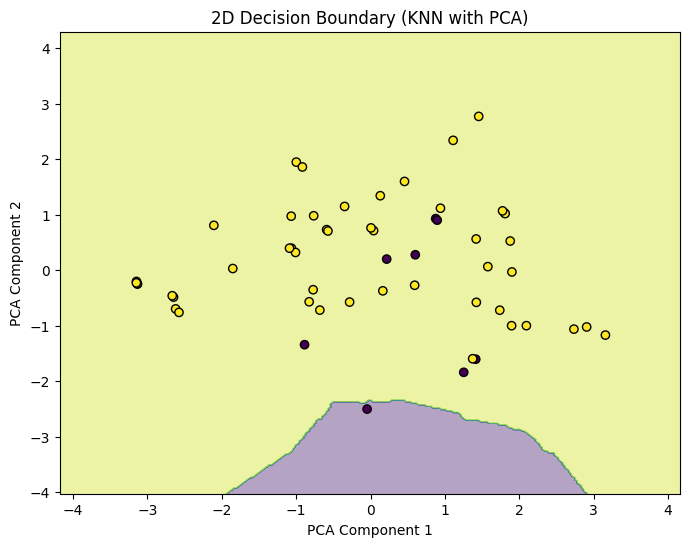

In [54]:
from sklearn.decomposition import PCA

# Scale full dataset using training scaler
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_full)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

knn_2d = KNeighborsClassifier(
    n_neighbors=best_model.named_steps["knn"].n_neighbors
)
knn_2d.fit(X_train_p, y_train_p)

# Mesh grid
x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test_p[:,0], X_test_p[:,1], c=y_test_p, edgecolor="k")
plt.title("2D Decision Boundary (KNN with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
